In [1]:
# import libraries 
# ----------------
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check .mat file 
# ---------------
from scipy.io import whosmat
whosmat('Neuhausen_data.mat') # to list variables inside mat file

[('dt', (1, 1), 'double'),
 ('tmax', (1, 1), 'double'),
 ('nt', (1, 1), 'double'),
 ('timevector', (1, 4000), 'double'),
 ('shot', (1, 1), 'double'),
 ('coord_rec', (88, 3), 'double'),
 ('coord_src', (1, 3), 'double'),
 ('distance_rec', (1, 87), 'double'),
 ('distance_src_rec', (1, 88), 'double'),
 ('vx', (4000, 88), 'double'),
 ('vz', (4000, 88), 'double')]

In [3]:
# load .mat file 
# --------------
from scipy.io import loadmat
mat = loadmat('Neuhausen_data.mat')  # to load mat file
# convert them to numpy array
vx = mat['vx']
vz = mat['vz']
dt = mat['dt'][0,0]
nt = mat['nt'][0,0]
tmax = mat['tmax'][0,0]
shot = mat['shot'][0,0]
coord_rec  = mat['coord_rec']
coord_src  = mat['coord_src']
timevector = mat['timevector'][0,:]
distance_rec     = mat['distance_rec'][0,:]
distance_src_rec = mat['distance_src_rec'][0,:]

In [4]:
# initialize parameters 
# ---------------------
alpha = 600  # P-wave velocity
beta = 300   # S-wave velocity

In [5]:
# calculate wavefield gradients 
# -----------------------------
from fd_weights import *

# allocate zero gradients
gradx_vx = np.zeros((vx.shape[0],vx.shape[1]))
gradx_vz = np.zeros((vz.shape[0],vz.shape[1]))

# calculate spatial wavefield gradients 
for n in range(1,(vx.shape[1]-1)):
    # FD coefficents according to Fornberg (1988)
    c = fd_weights(0, [-distance_rec[n-1], distance_rec[n] - distance_rec[n], distance_rec[n]], 2)
    # horizontal gradient of vx
    gradx_vx[:,n] = ((c[0]*vx[:,n-1]) + (c[1]*vx[:,n]) + (c[2]*vx[:,n+1])) 
    # horizontal gradient of vz
    gradx_vz[:,n] = ((c[0]*vz[:,n-1]) + (c[1]*vz[:,n]) + (c[2]*vz[:,n+1])) 

# P/S separation 
# --------------
# upgoing P-wave on vz
vz_P_up = (1/2.) * (vz + ((beta*((2*beta)/alpha)) * (gradx_vx.cumsum(axis=0)*dt))) 
# upgoing S-wave on vx
vx_S_up = (1/2.) * (vx - ((2*beta) * (gradx_vz.cumsum(axis=0)*dt)))

<IPython.core.display.Javascript object>


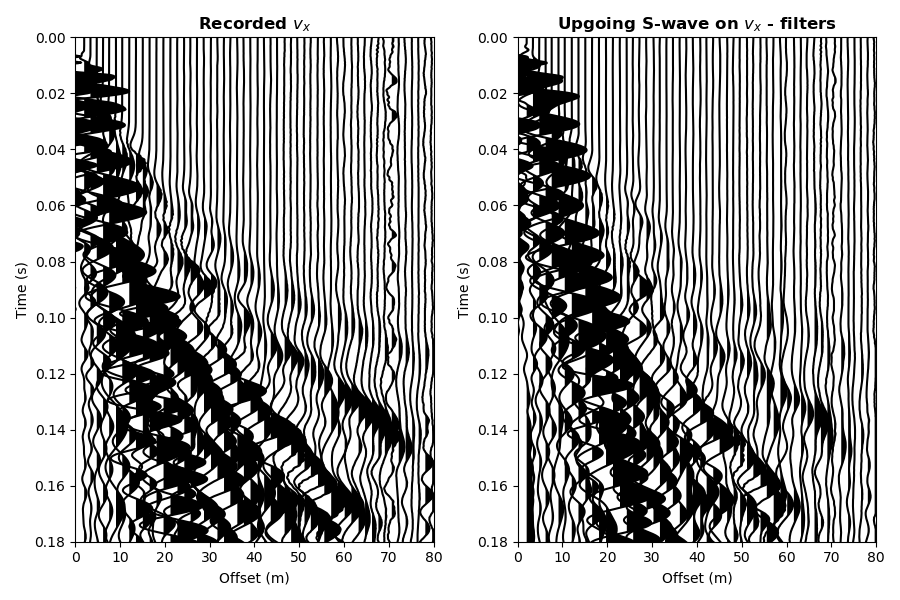

In [11]:
# plotting configuration 
# ----------------------
from wiggle import *
plt.figure(figsize=(9, 6))

# recorded vx
plt.subplot(1,2,1)
wiggle(vx, timevector, distance_src_rec, color='k')
plt.xlabel('Offset (m)')
plt.ylabel('Time (s)')
plt.title('Recorded $v_x$',fontweight="bold")
plt.xlim(0,80)
plt.ylim(0.18,0.0)

# P/S separated upgoing vx
plt.subplot(1,2,2)
wiggle(vx_S_up,timevector, distance_src_rec, color='k')
plt.xlabel('Offset (m)')
plt.ylabel('Time (s)')
plt.title('Upgoing S-wave on $v_x$ - filters',fontweight="bold")
plt.xlim(0,80)
plt.ylim(0.18,0.0)

# show result on screen
plt.tight_layout()
plt.show()